In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("Data/US_Accidents_Dec21_updated.csv")
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])
data.insert(4,"time diff",(data['End_Time']-data["Start_Time"]).dt.total_seconds())
data.insert(3,"Year",pd.DatetimeIndex(data["Start_Time"]).year)
data.insert(4,"Month",pd.DatetimeIndex(data["Start_Time"]).month)
data.insert(5,"Day",pd.DatetimeIndex(data["Start_Time"]).day)
print(data.info())
#data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 51 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   Year                   int64         
 4   Month                  int64         
 5   Day                    int64         
 6   End_Time               datetime64[ns]
 7   time diff              float64       
 8   Start_Lat              float64       
 9   Start_Lng              float64       
 10  End_Lat                float64       
 11  End_Lng                float64       
 12  Distance(mi)           float64       
 13  Description            object        
 14  Number                 float64       
 15  Street                 object        
 16  Side                   object        
 17  City                   object        
 18  County                

In [13]:
data.drop(columns=['Number', 'Zipcode', 'Airport_Code', 'Wind_Chill(F)', 'Wind_Direction', 
                   'Amenity','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

,ID,Severity,Start_Time,Year,Month,Day,End_Time,time diff,Start_Lat,Start_Lng,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,3,2016-02-08 00:37:08,2016,2,8,2016-02-08 06:37:08,21600.0,40.108910,-83.092860,...,False,False,False,False,False,False,False,False,False,Night
1,A-2,2,2016-02-08 05:56:20,2016,2,8,2016-02-08 11:56:20,21600.0,39.865420,-84.062800,...,False,False,False,False,False,False,False,False,False,Night
2,A-3,2,2016-02-08 06:15:39,2016,2,8,2016-02-08 12:15:39,21600.0,39.102660,-84.524680,...,True,False,False,False,False,False,False,False,False,Night
3,A-4,2,2016-02-08 06:51:45,2016,2,8,2016-02-08 12:51:45,21600.0,41.062130,-81.537840,...,False,False,False,False,False,False,False,False,False,Night
4,A-5,3,2016-02-08 07:53:43,2016,2,8,2016-02-08 13:53:43,21600.0,39.172393,-84.492792,...,False,False,False,False,False,False,False,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019,8,23,2019-08-23 18:32:01,1716.0,34.002480,-117.379360,...,False,False,False,False,False,False,False,False,False,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019,8,23,2019-08-23 19:38:23,1613.0,32.766960,-117.148060,...,False,False,False,False,False,False,False,False,False,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019,8,23,2019-08-23 19:28:49,1708.0,33.775450,-117.847790,...,True,False,False,False,False,False,False,False,False,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019,8,23,2019-08-23 19:29:42,1761.0,33.992460,-118.403020,...,False,False,False,False,False,False,False,False,False,Day


In [4]:
# data continuous 
data_continuous = data[['Start_Lat', 'Start_Lng', 'Temperature(F)','Humidity(%)',
                      'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'time diff']]

In [14]:
corrMatrix = data_continuous.corr(method = 'pearson').round(2)
print(corrMatrix)
# select correlation greater than 0.2
corrMatrix_n = corrMatrix[abs(corrMatrix) >= 0.2]

                 Start_Lat  Start_Lng  Temperature(F)  Humidity(%)  \
Start_Lat             1.00      -0.15           -0.48         0.01   
Start_Lng            -0.15       1.00            0.03         0.17   
Temperature(F)       -0.48       0.03            1.00        -0.37   
Humidity(%)           0.01       0.17           -0.37         1.00   
Pressure(in)         -0.23       0.21            0.14         0.14   
Visibility(mi)       -0.09       0.03            0.21        -0.36   
Wind_Speed(mph)       0.03       0.09            0.08        -0.17   
time diff            -0.01       0.00           -0.00         0.01   

                 Pressure(in)  Visibility(mi)  Wind_Speed(mph)  time diff  
Start_Lat               -0.23           -0.09             0.03      -0.01  
Start_Lng                0.21            0.03             0.09       0.00  
Temperature(F)           0.14            0.21             0.08      -0.00  
Humidity(%)              0.14           -0.36            -0.17   

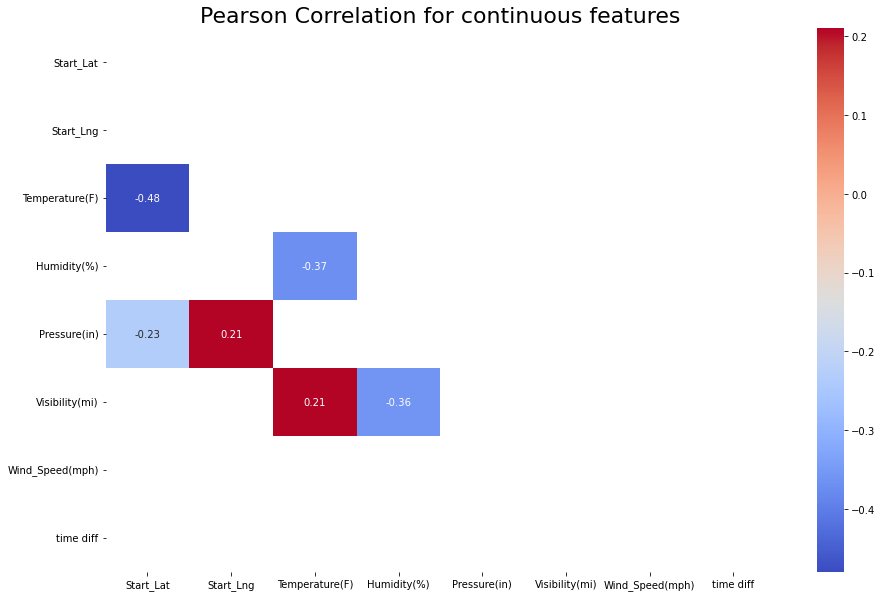

<Figure size 1440x720 with 0 Axes>

In [21]:
corrMatrix_nn = np.triu(corrMatrix_n)
sn.heatmap(corrMatrix_n, cmap="coolwarm",annot = True, mask = corrMatrix_nn, fmt='.2f').set_title('Pearson Correlation for continuous features', fontsize=22)
plt.figure(figsize=(20,10))
#sns.heatmap(data_modelling_df[continuous_feature].corr(), cmap="coolwarm",
#            annot = True, fmt='.3f').set_title('Pearson Correlation for continuous features', fontsize=22)
plt.rcParams["figure.figsize"] = (15,10)
plt.show()
# weak: 0.2 ~ 0.39; moderate: 0.4 ~ 0.59
# There are moderate relationship between:
# Temperature and Start_Lat
# There are weak relationship between:
# Pressure and Temperature
# Temperature and Humidity
# Visibility and Humidity
# Temperature and Start_Lng